In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import joblib
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [2]:
df=pd.read_csv('/content/Delhi_weather.csv')

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
df.dtypes

,0
datetime_utc,object
_conds,object
_dewptm,float64
_fog,int64
_hail,int64
_heatindexm,float64
_hum,float64
_precipm,float64
_pressurem,float64
_rain,int64


In [5]:
#shape of dataset
df.shape

(100990, 20)

#***EDA(Explotary Data Analysis):-***

In [6]:
#check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [7]:
# Remove '_' from column names
df.columns = [col.replace('_', '') for col in df.columns]

print("\nColumn names after removing '_':-")
print(df.columns)


Column names after removing '_':-
Index(['datetimeutc', ' conds', ' dewptm', ' fog', ' hail', ' heatindexm',
       ' hum', ' precipm', ' pressurem', ' rain', ' snow', ' tempm',
       ' thunder', ' tornado', ' vism', ' wdird', ' wdire', ' wgustm',
       ' windchillm', ' wspdm'],
      dtype='object')


In [8]:
#change index in to datetime
df.index=pd.to_datetime(df.datetimeutc)

In [9]:
#drop the column datetime_utc
df.drop('datetimeutc',axis=1,inplace=True)

In [10]:
df.head()

,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
datetimeutc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [11]:
#check the null values
df.isnull().sum()

,0
conds,72
dewptm,621
fog,0
hail,0
heatindexm,71835
hum,757
precipm,100990
pressurem,232
rain,0
snow,0


In [12]:
df.index.year.value_counts().sort_index()

,count
datetimeutc,
1996,1278
1997,6513
1998,3579
1999,6300
2000,5391
2001,8403
2002,8503
2003,13186
2004,9151


In [13]:
#drop the column that has the large number of null values
df.drop(columns=[' precipm',' windchillm',' wgustm',' heatindexm'],axis=1,inplace=True)

In [14]:
df = df.ffill()

In [15]:
df.shape

(100990, 15)

In [16]:
# Replace missing values
df[' pressurem'] = df[' pressurem'].replace(-9999.0, np.nan)
df[' pressurem'].fillna(method='ffill', inplace=True)  # or another strategy

In [17]:
df.isnull().sum()

,0
conds,0
dewptm,0
fog,0
hail,0
hum,0
pressurem,0
rain,0
snow,0
tempm,0
thunder,0


In [18]:
#check the dataset describe
df.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,100990.000000,100990.000000,100990.000000,100990.000000,1.009900e+05,100990.000000,100990.000000,100990.000000,100990.000000,100990.00000,100990.000000,100990.000000,100990.000000
mean,15.735291,0.069690,0.000129,57.957422,2.012170e+03,0.026260,0.000010,25.438222,0.009427,0.00002,2.384755,171.042499,7.609648
std,7.061785,0.254625,0.011345,23.821218,3.180111e+05,0.159908,0.003147,8.487994,0.096633,0.00445,20.288656,120.646712,11.840612
min,-24.000000,0.000000,0.000000,4.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,60.000000,0.000000
50%,15.000000,0.000000,0.000000,59.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,180.000000,7.400000
75%,22.000000,0.000000,0.000000,78.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,280.000000,11.100000
max,75.000000,1.000000,1.000000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,1514.900000


In [19]:
# Extract datetime features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

#***Data Visualization:-***

In [20]:
#year column
df['year'] = df.index.year

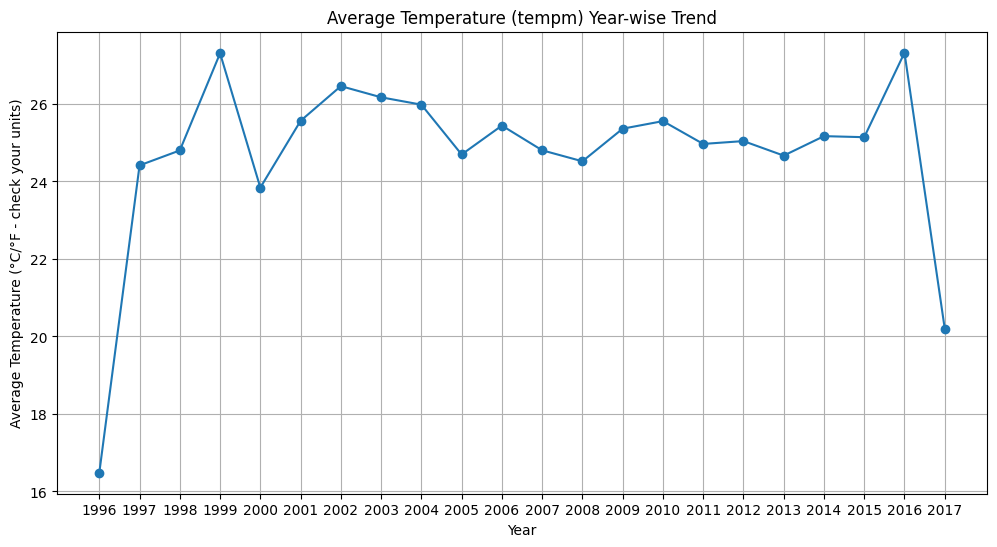

In [21]:
# --- Year-wise Line Chart ---
# You might want to plot the average temperature per year.

plt.figure(figsize=(12, 6))
df.groupby('year')[' tempm'].mean().plot(kind='line', marker='o')
plt.title('Average Temperature (tempm) Year-wise Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C/°F - check your units)')
plt.grid(True)
plt.xticks(df['year'].unique()) # Ensure all years are shown as ticks
plt.show()

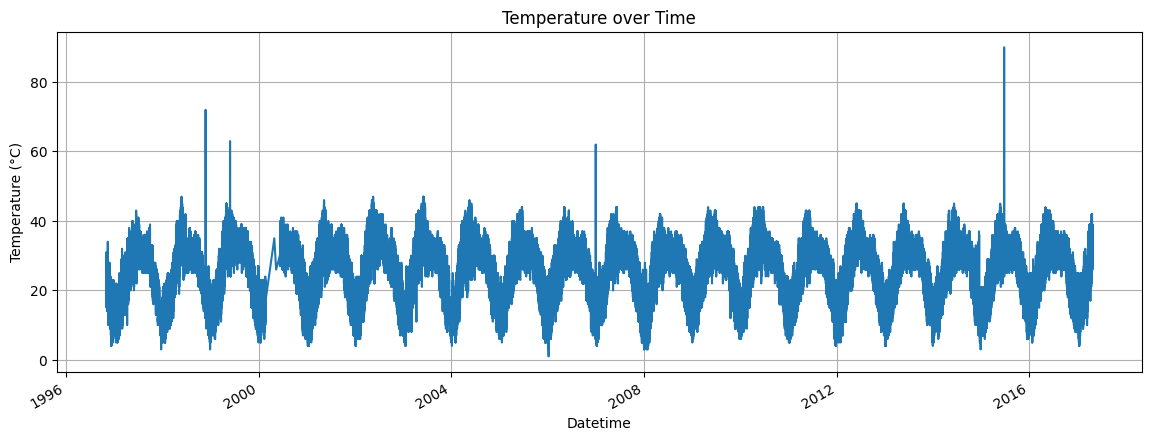

In [22]:
#Track a single variable like tempm (temperature) over time
df[' tempm'].plot(figsize=(14, 5), title='Temperature over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

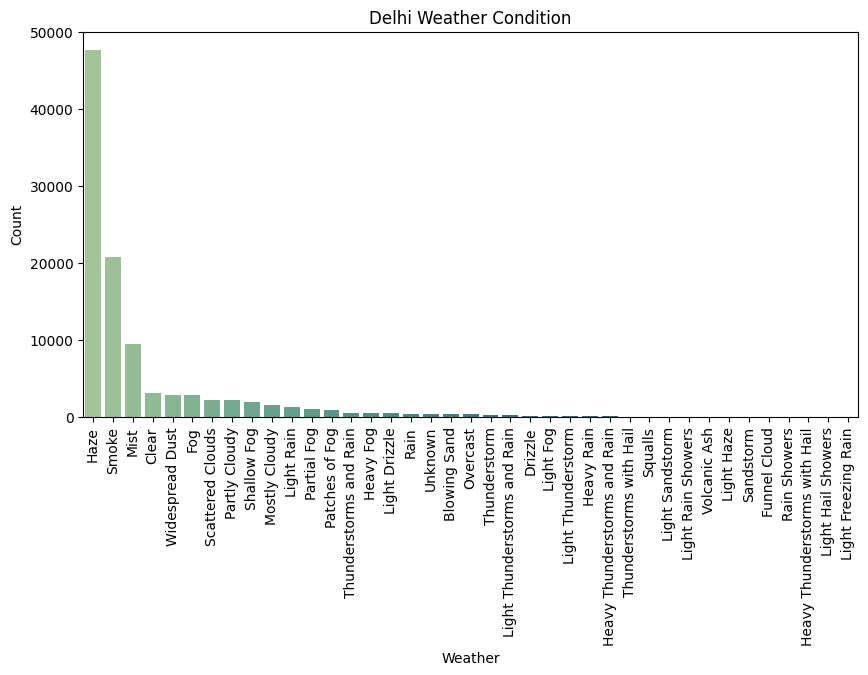

In [23]:
#Delhi weather condition
plt.figure(figsize=(10,5))
sns.countplot(x = " conds", data = df, palette='crest', order=df[" conds"].value_counts().index)
plt.title('Delhi Weather Condition')
plt.xlabel("Weather")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.yticks()
plt.show()

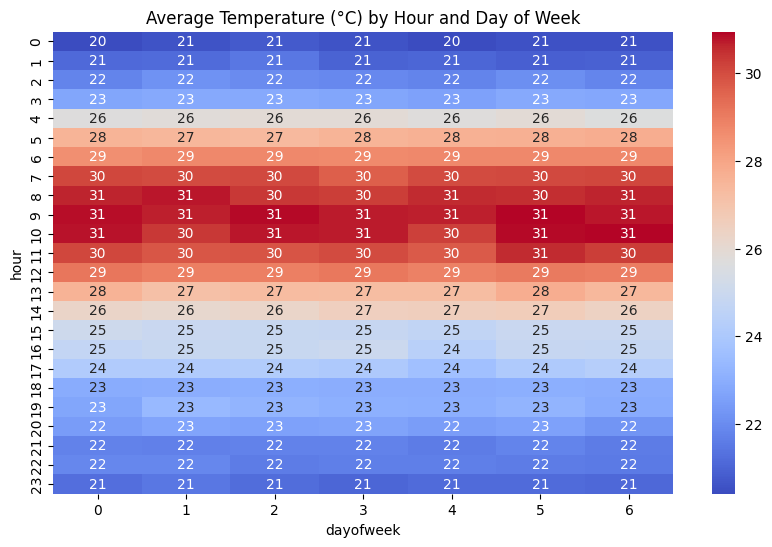

In [24]:
#Heatmap (Hour vs Day or Month vs Hour)
pivot = df.pivot_table(index='hour', columns='dayofweek', values=' tempm', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Average Temperature (°C) by Hour and Day of Week')
plt.show()

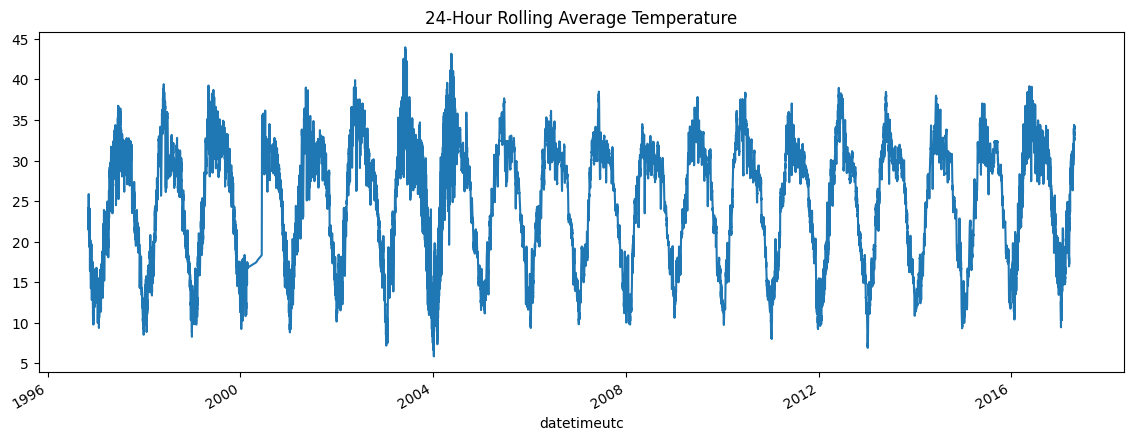

In [25]:
df[' tempm'].rolling(window=24).mean().plot(figsize=(14,5), title='24-Hour Rolling Average Temperature')
plt.show()


<Figure size 1200x1000 with 0 Axes>

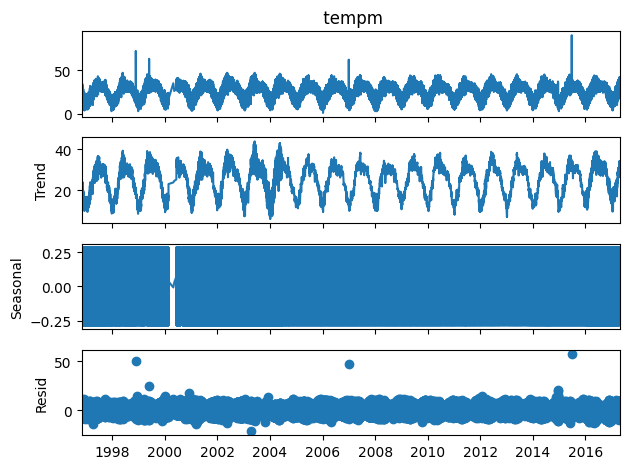

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12,10))
result = seasonal_decompose(df[' tempm'], model='additive', period=24)  # daily seasonality
result.plot()
plt.show()


In [27]:
df[' thunder'].value_counts()

,count
thunder,
0,100038
1,952


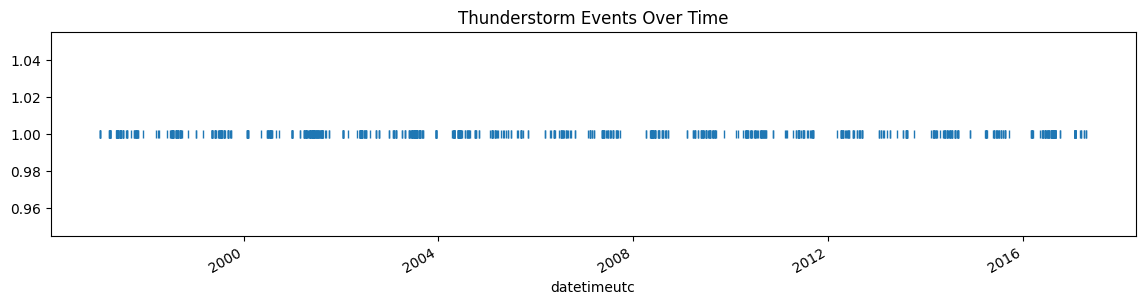

In [28]:
df[df[' thunder'] == 1][' thunder'].plot(style='|', title='Thunderstorm Events Over Time', figsize=(14,3))
plt.show()


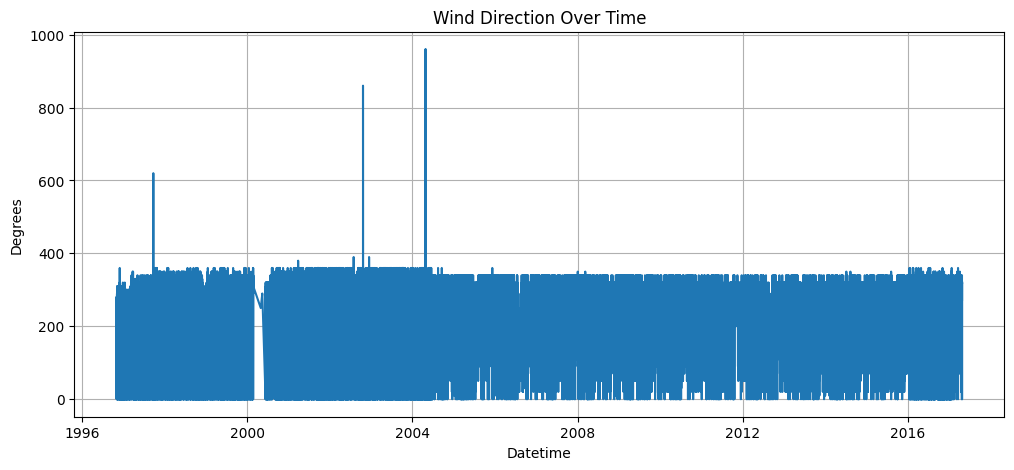

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df[' wdird'])
plt.title('Wind Direction Over Time')
plt.ylabel('Degrees')
plt.xlabel('Datetime')
plt.grid(True)
plt.show()


In [30]:
df.dtypes

,0
conds,object
dewptm,float64
fog,int64
hail,int64
hum,float64
pressurem,float64
rain,int64
snow,int64
tempm,float64
thunder,int64


In [31]:
df[' conds'].value_counts()

,count
conds,
Haze,47639
Smoke,20765
Mist,9389
Clear,3129
Widespread Dust,2862
Fog,2760
Scattered Clouds,2209
Partly Cloudy,2092
Shallow Fog,1860


In [32]:
df[' wdire'].value_counts()

,count
wdire,
North,20093
West,13657
NW,10339
WNW,9439
East,8205
ESE,6165
WSW,5864
SE,4163
ENE,4108


In [33]:
#copy the dataset
df1 = df.copy()

#***Label encoding:-***

In [34]:
# Label Encoding for 'conds'
le_conds = LabelEncoder()
df['conds_encoded'] = le_conds.fit_transform(df[' conds'])
joblib.dump(le_conds, 'label_encoder_conds.pkl')

# Label Encoding for 'wdire'
le_wdire = LabelEncoder()
df['wdire_encoded'] = le_wdire.fit_transform(df[' wdire'])
joblib.dump(le_wdire, 'label_encoder_wdire.pkl')

['label_encoder_wdire.pkl']

In [35]:
#check the categorical column
cate_col=df.select_dtypes(include='object').columns
cate_col

Index([' conds', ' wdire'], dtype='object')

In [36]:
#drop thes two column
df.drop(columns=[' conds',' wdire'],axis=1,inplace=True)

In [37]:
df.head()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,hour,dayofweek,month,year,conds_encoded,wdire_encoded
datetimeutc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,11,4,11,1996,31,16
1996-11-01 12:00:00,10.0,0,0,32.0,1010.0,0,0,28.0,0,0,5.0,0.0,7.4,12,4,11,1996,31,7
1996-11-01 13:00:00,11.0,0,0,44.0,1010.0,0,0,24.0,0,0,5.0,0.0,7.4,13,4,11,1996,31,7
1996-11-01 14:00:00,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,7.4,14,4,11,1996,31,7
1996-11-01 16:00:00,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,16,4,11,1996,31,7


#***Scale the dataset:-***

In [38]:
# Select features (excluding target)
features = df.drop(columns=['conds_encoded'])  # or any other columns like 'wdire', 'conds'

# Initialize and fit scaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Save the scaler
import joblib
joblib.dump(scaler, 'weather_scaler.pkl')

['weather_scaler.pkl']

In [39]:
def create_sequences(X, y, time_steps=24):  # using 24 past hours
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X, y = create_sequences(scaled_features, df['conds_encoded'].values)

#***Train-Test Split***:-

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


#***Build and Train the LSTM Model:-***

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(df['conds_encoded'].unique()), activation='softmax'))  # for multi-class

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.5734 - loss: 1.5636 - val_accuracy: 0.6136 - val_loss: 1.4103
Epoch 2/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6823 - loss: 1.0318 - val_accuracy: 0.6508 - val_loss: 1.2686
Epoch 3/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.6979 - loss: 0.9728 - val_accuracy: 0.6797 - val_loss: 1.2057
Epoch 4/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7037 - loss: 0.9437 - val_accuracy: 0.6781 - val_loss: 1.1332
Epoch 5/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7119 - loss: 0.9177 - val_accuracy: 0.6822 - val_loss: 1.1156
Epoch 6/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.7154 - loss: 0.8981 - val_accuracy: 0.6846 - val_loss: 1.1226
Epoch 7/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7172 - loss: 0.8865 - val_accuracy: 0.6858 - val_loss: 1.1011
Epoch 8/10
2272/2272 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.7254 -

#***Evaluate the Model:-***

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

632/632 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5780 - loss: 1.5540
Test Accuracy: 0.5924


#***save the model:-***

In [43]:
model.save("weather_lstm_model.h5")